Best theta: 50.18°, Calculated alpha1: 99.92°


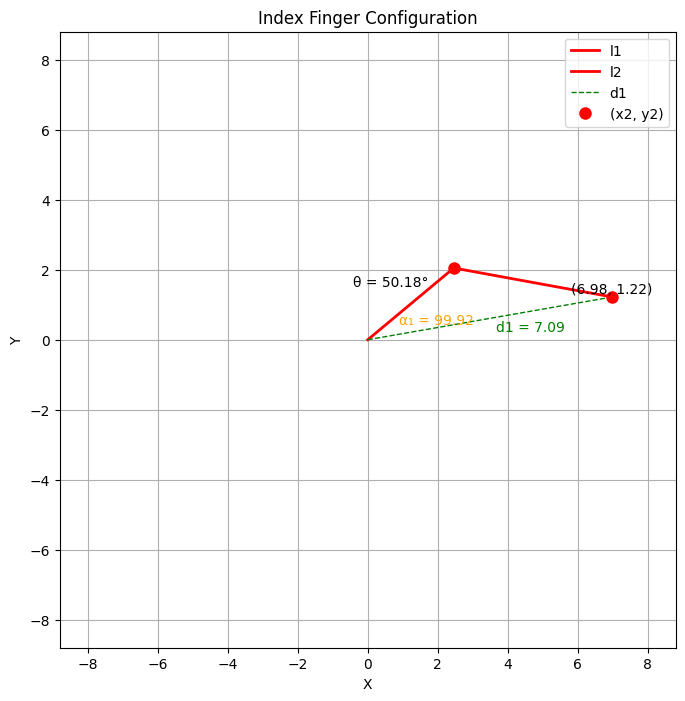

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def simulate_index_finger(l1, l2, alpha1):
    """
    Simulates the index finger and returns results, including x1, y1.
    """
    theta_values = np.linspace(0, 180, 600)
    phi1_values = []
    d1_values = []
    alpha1_calculated_values = []
    x_joint_values = []
    y_joint_values = []
    x_end_values = []
    y_end_values = []

    for theta in theta_values:
        theta_rad = np.radians(theta)

        x_joint = l1 * np.sin(theta_rad)
        y_joint = l1 * np.cos(theta_rad)
        x_end = x_joint + l2 * np.sin(2 * theta_rad)
        y_end = y_joint + l2 * np.cos(2 * theta_rad)

        d1 = np.sqrt(x_end**2 + y_end**2)
        phi1 = 180 - theta

        # Calculate the angle of d1 with respect to the positive x-axis
        angle_d1_rad = np.arctan2(x_end, y_end)

        # Calculate alpha1 as the angle with the positive y-axis (vertical)
        alpha1_calculated_rad = np.pi - angle_d1_rad
        alpha1_calculated = np.degrees(alpha1_calculated_rad)

        phi1_values.append(phi1)
        d1_values.append(d1)
        alpha1_calculated_values.append(alpha1_calculated)
        x_joint_values.append(x_joint)
        y_joint_values.append(y_joint)
        x_end_values.append(x_end)
        y_end_values.append(y_end)

    return {
        'theta': theta_values,
        'phi1': phi1_values,
        'd1': d1_values,
        'alpha1_calculated': np.array(alpha1_calculated_values),
        'x_joint': np.array(x_joint_values),
        'y_joint': np.array(y_joint_values),
        'x_end': np.array(x_end_values),
        'y_end': np.array(y_end_values)
    }


def plot_index_finger_with_alpha(l1, l2, alpha1_known):
    """Plots the index finger simulation results with alpha1, d1, and phi1."""

    index_results = simulate_index_finger(l1, l2, alpha1_known)
    best_theta_index = np.argmin(np.abs(index_results['alpha1_calculated'] - alpha1_known))
    best_theta = index_results['theta'][best_theta_index]
    best_alpha1_calculated = index_results['alpha1_calculated'][best_theta_index]
    x_joint_best = index_results['x_joint'][best_theta_index]
    y_joint_best = index_results['y_joint'][best_theta_index]
    x_end_best = index_results['x_end'][best_theta_index]
    y_end_best = index_results['y_end'][best_theta_index]
    d1_best = index_results['d1'][best_theta_index]
    phi1_best = index_results['phi1'][best_theta_index]

    print(f"Best theta: {best_theta:.2f}°, Calculated alpha1: {best_alpha1_calculated:.2f}°")

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot links
    ax.plot([0, x_joint_best], [0, y_joint_best], 'r-', linewidth=2, label='l1')
    ax.plot([x_joint_best, x_end_best], [y_joint_best, y_end_best], 'r-', linewidth=2, label='l2')

    # Plot d1
    ax.plot([0, x_end_best], [0, y_end_best], 'g--', linewidth=1, label='d1')
    d1_label_x = x_end_best / 1.5
    d1_label_y = y_end_best / 3.5
    ax.text(d1_label_x, d1_label_y, f'd1 = {d1_best:.2f}', ha='center', va='center', color='green')

    # Plot joint and end point
    ax.plot(x_joint_best, y_joint_best, 'ro', markersize=8)
    ax.plot(x_end_best, y_end_best, 'ro', markersize=8, label='(x2, y2)')
    ax.text(x_end_best, y_end_best/0.85, f'({x_end_best:.2f}, {y_end_best:.2f})', ha='center', va='center')

    # Label theta
    theta_rad = np.radians(best_theta)
    theta_label_x = (l1 / 2) * np.sin(theta_rad) * 0.8
    theta_label_y = (l1 / 2) * np.cos(theta_rad) * 0.8
    ax.text(theta_label_x/1.5, theta_label_y/0.5, f'θ = {best_theta:.2f}°', ha='center', va='center')
    theta_arc = patches.Arc((0, 0), 0.8 * l1, 0.8 * l1, theta1=90, theta2=90 - best_theta, color='orange', linestyle='-', linewidth=1)

    # Draw alpha1 arc and label
    alpha1_rad = np.radians(best_alpha1_calculated)
    alpha1_arc_radius = np.sqrt(x_end_best**2 + y_end_best**2) * 0.3
    alpha1_arc = patches.Arc((0, 0), 2 * alpha1_arc_radius, 2 * alpha1_arc_radius,
                             theta1=90, theta2=90 - best_alpha1_calculated,
                             color='orange', linestyle='-', linewidth=1)

    alpha1_label_angle = (90 + (90 - best_alpha1_calculated)) / 2
    alpha1_label_radius = alpha1_arc_radius * 1.2
    alpha1_label_x = alpha1_label_radius * np.cos(np.radians(alpha1_label_angle))
    alpha1_label_y = alpha1_label_radius * np.sin(np.radians(alpha1_label_angle))
    ax.text(alpha1_label_x, alpha1_label_y/3, f'α₁ = {best_alpha1_calculated:.2f}', ha='center', va='center', color='orange')


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Index Finger Configuration')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-l1 - l2 - 1, l1 + l2 + 1])
    ax.set_ylim([-l1 - l2 - 1, l1 + l2 + 1])
    plt.show()

# Example usage:
l1 = 3.2
l2 = 4.6
alpha1_known = 100

plot_index_finger_with_alpha(l1, l2, alpha1_known)

Target (x, y): (5.40, -3.10)
Calculated Theta: 74.74°
Calculated Alpha1: 60.08°
Reached (x, y): (5.42, -3.12)


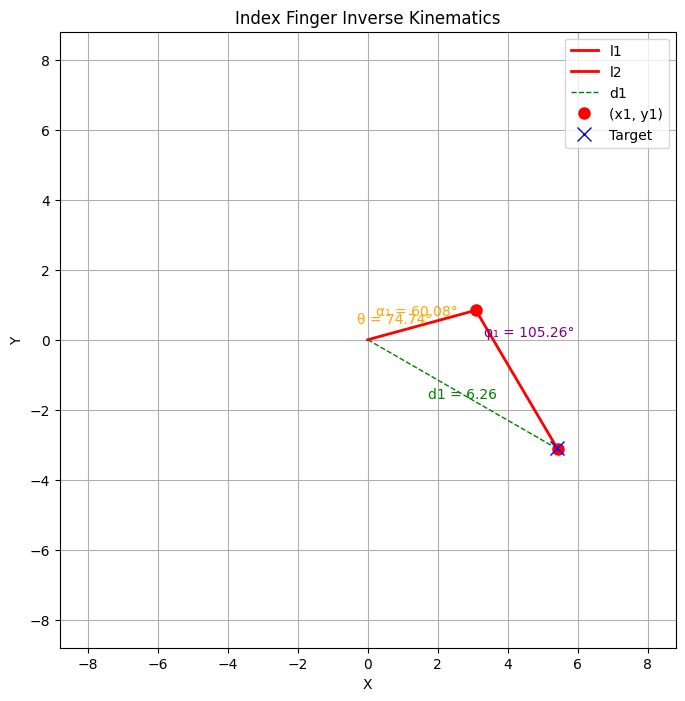

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import matplotlib.patches as patches

def calculate_endpoint(theta, l1, l2):
    """Calculates the (x, y) endpoint for a given theta."""
    theta_rad = np.radians(theta)
    x = l1 * np.sin(theta_rad) + l2 * np.sin(2 * theta_rad)
    y = l1 * np.cos(theta_rad) + l2 * np.cos(2 * theta_rad)
    return x, y

def calculate_alpha1(x, y):
    """Calculates alpha1 (degrees) from the endpoint coordinates."""
    angle_rad = np.arctan2(x, y)
    # alpha1_rad = np.pi/2 - angle_rad
    alpha1_rad = np.pi - angle_rad
    return np.degrees(alpha1_rad)

def error_function(theta, l1, l2, x_target, y_target):
    """Error function to minimize."""
    x_calc, y_calc = calculate_endpoint(theta[0], l1, l2)
    return (x_target - x_calc)**2 + (y_target - y_calc)**2

def solve_inverse_kinematics(l1, l2, x_target, y_target):
    """Solves for theta that reaches the target (x, y)."""
    initial_guess = [90]  # Start with a reasonable guess for theta
    result = optimize.fmin(error_function, initial_guess, args=(l1, l2, x_target, y_target), disp=False)
    best_theta = result[0]
    x_final, y_final = calculate_endpoint(best_theta, l1, l2)
    alpha1_final = calculate_alpha1(x_final, y_final)
    return best_theta, alpha1_final, x_final, y_final

def error_function_x(theta, l1, l2, x_target):
    """Error function to minimize for a target x."""
    x_calc, _ = calculate_endpoint(theta[0], l1, l2)
    return (x_target - x_calc)**2

def solve_for_x(l1, l2, x_target):
    """Solves for theta that achieves the target x."""
    initial_guess = [90]
    result = optimize.fmin(error_function_x, initial_guess, args=(l1, l2, x_target), disp=False)
    best_theta = result[0]
    x_final, y_final = calculate_endpoint(best_theta, l1, l2)
    alpha1_final = calculate_alpha1(x_final, y_final)
    return best_theta, alpha1_final, x_final, y_final

def error_function_y(theta, l1, l2, y_target):
    """Error function to minimize for a target y."""
    _, y_calc = calculate_endpoint(theta[0], l1, l2)
    return (y_target - y_calc)**2

def solve_for_y(l1, l2, y_target):
    """Solves for theta that achieves the target y."""
    initial_guess = [90]
    result = optimize.fmin(error_function_y, initial_guess, args=(l1, l2, y_target), disp=False)
    best_theta = result[0]
    x_final, y_final = calculate_endpoint(best_theta, l1, l2)
    alpha1_final = calculate_alpha1(x_final, y_final)
    return best_theta, alpha1_final, x_final, y_final

def plot_finger_configuration(l1, l2, theta, alpha1, x_end, y_end, x_target=None, y_target=None):
    """Plots the finger configuration."""
    x_joint = l1 * np.sin(np.radians(theta))
    y_joint = l1 * np.cos(np.radians(theta))

    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot links
    ax.plot([0, x_joint], [0, y_joint], 'r-', linewidth=2, label='l1')
    ax.plot([x_joint, x_end], [y_joint, y_end], 'r-', linewidth=2, label='l2')

    # Plot d1
    ax.plot([0, x_end], [0, y_end], 'g--', linewidth=1, label='d1')
    d1_dist = np.sqrt(x_end**2 + y_end**2)
    d1_label_x = x_end / 2
    d1_label_y = y_end / 2
    ax.text(d1_label_x, d1_label_y, f'd1 = {d1_dist:.2f}', ha='center', va='center', color='green')

    # Plot joint and end point
    ax.plot(x_joint, y_joint, 'ro', markersize=8)
    ax.plot(x_end, y_end, 'ro', markersize=8, label='(x1, y1)')

    # Label theta
    theta_arc_radius = 0.8
    theta_arc = patches.Arc((0, 0), 2 * theta_arc_radius, 2 * theta_arc_radius,
                             theta1=np.degrees(np.arctan2(0, 1)),
                             theta2=theta,
                             color='orange', linestyle='-', linewidth=1)
    # ax.add_patch(theta_arc)
    theta_label_angle_rad = np.radians(theta) / 2
    theta_label_radius = theta_arc_radius * 1.2
    theta_label_x = theta_label_radius * np.cos(theta_label_angle_rad)
    theta_label_y = theta_label_radius * np.sin(theta_label_angle_rad)
    ax.text(theta_label_x, theta_label_y, f'θ = {theta:.2f}°', ha='center', va='center', color='orange')

    # Draw alpha1 arc and label
    alpha1_arc_radius = np.sqrt(x_end**2 + y_end**2) * 0.2
    alpha1_start_angle_rad = np.pi / 2
    alpha1_end_angle_rad = np.arctan2(y_end, x_end)
    alpha1_arc = patches.Arc((0, 0), 2 * alpha1_arc_radius, 2 * alpha1_arc_radius,
                             theta1=np.degrees(alpha1_start_angle_rad),
                             theta2=np.degrees(alpha1_end_angle_rad),
                             color='orange', linestyle='-', linewidth=1)
    # ax.add_patch(alpha1_arc)
    alpha1_label_angle_rad = (alpha1_start_angle_rad + alpha1_end_angle_rad) / 2
    alpha1_label_radius = alpha1_arc_radius * 1.3
    alpha1_label_x = alpha1_label_radius * np.cos(alpha1_label_angle_rad)
    alpha1_label_y = alpha1_label_radius * np.sin(alpha1_label_angle_rad)
    ax.text(alpha1_label_x, alpha1_label_y, f'α₁ = {alpha1:.2f}°', ha='center', va='center', color='orange')

    # Draw phi1 arc and label
    phi1 = 180 - theta
    phi1_arc_radius = l2 * 0.3
    angle_l1_rad = np.arctan2(y_joint, x_joint)
    angle_l2_rad = np.arctan2(y_end - y_joint, x_end - x_joint)
    phi1_start_angle_deg = np.degrees(angle_l1_rad)
    phi1_end_angle_deg = np.degrees(angle_l2_rad)
    if phi1_end_angle_deg < phi1_start_angle_deg:
        phi1_end_angle_deg += 360
    phi1_arc = patches.Arc((x_joint, y_joint), 2 * phi1_arc_radius, 2 * phi1_arc_radius,
                            theta1=phi1_start_angle_deg, theta2=phi1_end_angle_deg,
                            color='purple', linestyle='-', linewidth=1)
    # ax.add_patch(phi1_arc)
    phi1_label_angle_rad = (angle_l1_rad + angle_l2_rad) / 2
    phi1_label_radius = phi1_arc_radius * 1.2
    phi1_label_x = x_joint + phi1_label_radius * np.cos(phi1_label_angle_rad)
    phi1_label_y = y_joint + phi1_label_radius * np.sin(phi1_label_angle_rad)
    ax.text(phi1_label_x, phi1_label_y, f'φ₁ = {phi1:.2f}°', ha='center', va='center', color='purple')

    if x_target is not None and y_target is not None:
        ax.plot(x_target, y_target, 'bx', markersize=10, label='Target')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Index Finger Inverse Kinematics')
    ax.legend()
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim([-l1 - l2 - 1, l1 + l2 + 1])
    ax.set_ylim([-l1 - l2 - 1, l1 + l2 + 1])
    plt.show()

# Example usage:
l1 = 3.2
l2 = 4.6
x_target = 5.4
y_target = -3.1

best_theta, alpha1_result, x_final, y_final = solve_inverse_kinematics(l1, l2, x_target, y_target)

print(f"Target (x, y): ({x_target:.2f}, {y_target:.2f})")
print(f"Calculated Theta: {best_theta:.2f}°")
print(f"Calculated Alpha1: {alpha1_result:.2f}°")
print(f"Reached (x, y): ({x_final:.2f}, {y_final:.2f})")

plot_finger_configuration(l1, l2, best_theta, alpha1_result, x_final, y_final, x_target, y_target)

Target X: 5.40
Calculated Theta: 74.93°
Calculated Alpha1: 59.78°
Reached (x, y): (5.40, -3.15)


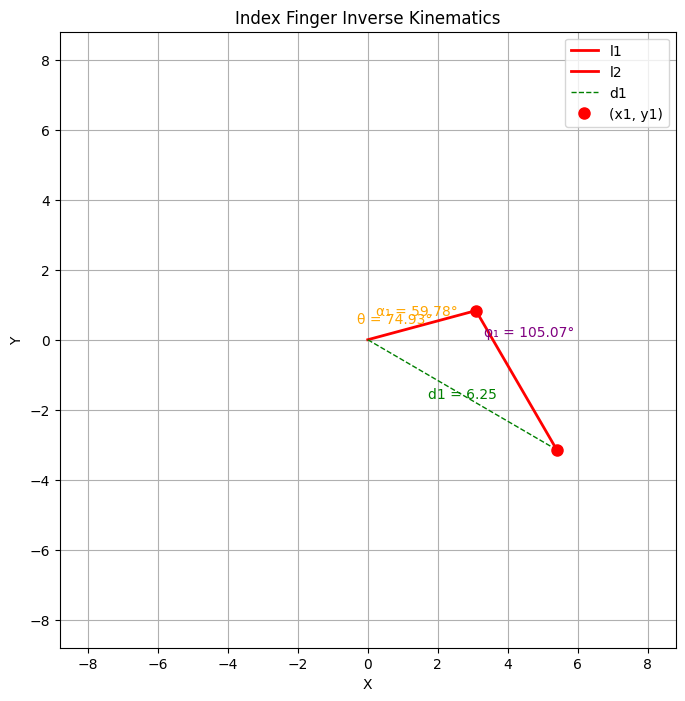

In [68]:
x_target = 5.4

best_theta_x, alpha1_x, x_final_x, y_final_x = solve_for_x(l1, l2, x_target)

print(f"Target X: {x_target:.2f}")
print(f"Calculated Theta: {best_theta_x:.2f}°")
print(f"Calculated Alpha1: {alpha1_x:.2f}°")
print(f"Reached (x, y): ({x_final_x:.2f}, {y_final_x:.2f})")

plot_finger_configuration(l1, l2, best_theta_x, alpha1_x, x_final_x, y_final_x)


Target Y: 4.00
Calculated Theta: 36.06°
Calculated Alpha1: 122.57°
Reached (x, y): (6.26, 4.00)


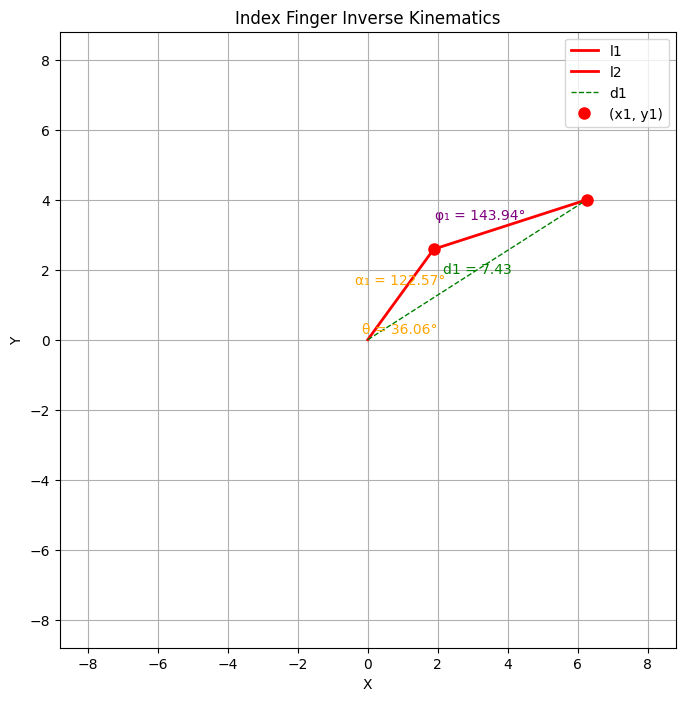

In [70]:
y_target = 4

best_theta_y, alpha1_y, x_final_y, y_final_y = solve_for_y(l1, l2, y_target)

print(f"Target Y: {y_target:.2f}")
print(f"Calculated Theta: {best_theta_y:.2f}°")
print(f"Calculated Alpha1: {alpha1_y:.2f}°")
print(f"Reached (x, y): ({x_final_y:.2f}, {y_final_y:.2f})")

plot_finger_configuration(l1, l2, best_theta_y, alpha1_y, x_final_y, y_final_y)
